In [ ]:
!pip install -q tensorflow-datasets 

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds
# tf.enable_eager_execution()

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.
Label: 4


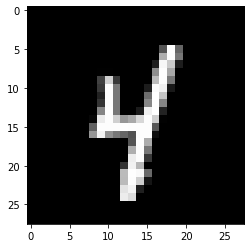

In [ ]:
# EXTRACT

dataset = tfds.load(name="mnist", split="train")

# TRANSFORM
dataset.shuffle(100)

# LOAD
for data in dataset.take(1):
  image, label = data["image"], data["label"]

  plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
  print("Label: %d" % label.numpy())

In [ ]:
# Specifying data types

import tesorflow as tf



# Defaults to a tf.float32 scaler.
numeric_feature_column = tf.feature_column.numeric_column(key="SepalLength")

# Represent a tf.float64 scalar.

numeric_feature_column = tf.feature_column.numeric_column(key="SepalLength", dtype=tf.float64)

# Represent a 10-element vector in which each cell contains a tf.float32.

vector_feature_colum = tf.feature_column.numeric_column(key="Bowling", shape=10)

# Represent a 10x5 matrix in which each cell contains a tf.float32.

matrix_feature_column = tf.feature_column.numeric_column(key="MyMatrix", shape=[10, 5])

In [ ]:


# Bucketizing features (used for categorical identity column)

# First, convert the raw input to a numeric column.
numeric_feature_column = tf.feature_column.numeric_column("Year")

# Then, bucketize the numeric column on the years 1960, 1980, and 2000

bucketized_feature_column = tf.feature_column.bucketized_column(
    source_column = numeric_feature_column,
    boundaries = [1960, 1980, 2000]
)


# Categorical identity features

identity_feature_column = tf.feature_column.categorical_column_with_identity(
    key='my_feature_b',
    num_buckets=4) # Values [0, 4]

In [ ]:
# Categorical vocabulary column

# From a vocabulary list

vocabulary_feature_column = tf.feature_column.categorical_column_with_vocabulary_list(
    key=feature_name,
    vocabulary_list=["kitchenware", "electronics", "sports"]
)

# From a vocabulary file

vocabulary_feature_column = tf.feature_column.categorical_column_with_vocabulary_file(
    key=feature_name,
    vocabulary_file="product_class.txt",
    vocabulary_size=3
)



# Hashed column

hashed_feature_column = tf.feature_column.categorical_column_with_hash_bucket(
    key="some_feature", 
    hash_bucket_size=100 # The number of categories
)

In [ ]:
# Crossed Column



# Bucketized the latitude and longitude using the `edges`

latitude_bucket_fn = tf.feature_column.bucketized_column(
    tf.feature_column.numeric_column('latitude'),
    list(atlanta.latitude.edges)
)

longitude_bucket_fn = tf.feature_column.bucketized_columns(
    tf.feature_column.numeric_column('longitude'),
    list(atlanta.longitude.edges)
)


# Cross the bucketized columns, using 5000 has bins.

crossed_lat_lon_fn = tf.feature_column.crossed_column(
    [latitude_bucket_fn, longitude_bucket_fn], 5000)

In [ ]:
# Embedding column

embedding_dimensions = number_of_categories**0.25

categorical_column = ... # Create any categorical column

# Represent the categorical column as an embedding columns.
# This means creating an embedding vector lookup table with one element for each category

embedding_column = tf.feature_column.embedding_column(
    categorical_column=categorical_column,
    dimension=embedding_dimensions
)